In [4]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [ ]:
#Fetching Images count from Folders

In [6]:
count = 0
dirs = os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

daisy Folder has 764 Images
dandelion Folder has 1052 Images
rose Folder has 784 Images
sunflower Folder has 733 Images
tulip Folder has 984 Images
Images Folder has 4317 Images


In [ ]:
#Loading Images into Arrays as Dataset

In [7]:
base_dir = 'Images/'
img_size = 180
batch = 32

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [9]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [10]:
import matplotlib.pyplot as plt

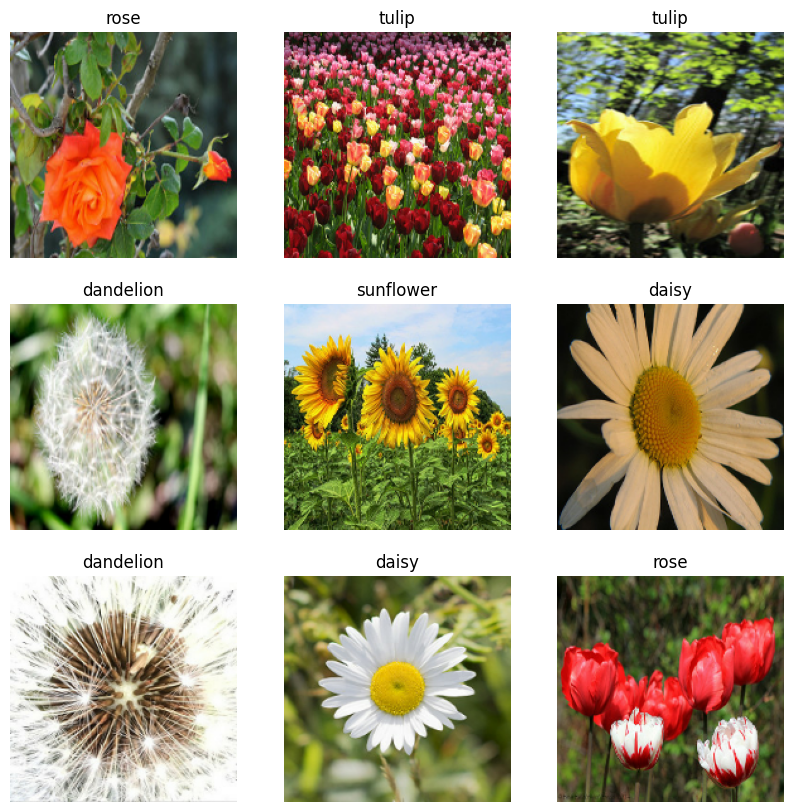

In [11]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [12]:
AUTOTUNE = tf.data.AUTOTUNE

In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [14]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [ ]:
#Data Augmentation

In [15]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

c:\Users\DELL\OneDrive\Documents\Flower Recognition\.venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#MOdel Creation

In [16]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 33s 258ms/step - accuracy: 0.3530 - loss: 1.5243 - val_accuracy: 0.5145 - val_loss: 1.1604
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 28s 258ms/step - accuracy: 0.5677 - loss: 1.0636 - val_accuracy: 0.6014 - val_loss: 0.9908
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 27s 253ms/step - accuracy: 0.6459 - loss: 0.9481 - val_accuracy: 0.6651 - val_loss: 0.9231
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 28s 257ms/step - accuracy: 0.6660 - loss: 0.8920 - val_accuracy: 0.6744 - val_loss: 0.8276
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 28s 257ms/step - accuracy: 0.6866 - loss: 0.8119 - val_accuracy: 0.6848 - val_loss: 0.8486
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 29s 272ms/step - accuracy: 0.7020 - loss: 0.7852 - val_accuracy: 0.7010 - val_loss: 0.8082
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 29s 264ms/step - accuracy: 0.7303 - loss: 0.7228 - val_accuracy: 0.7057 - val_loss: 0.7703
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 27s 254ms/step - accuracy: 0.7226 - loss: 0

In [29]:
def classify_images(image_path):
    input_image = Image.open(image_path).resize((180, 180)).convert('RGB')
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

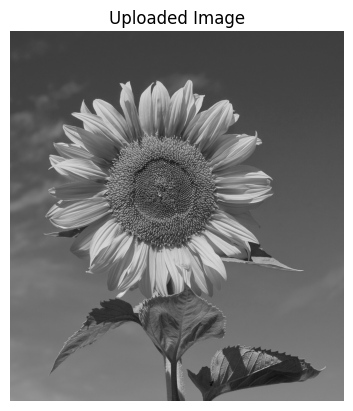

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


'The Image belongs to sunflower with a score of 99.59225'

In [30]:
from PIL import Image, ImageOps
file_name = 'sample/image.png'

# Load image using PIL
img = Image.open(file_name).convert('L')

plt.imshow(img, cmap='gray')
plt.title("Uploaded Image")
plt.axis('off')
plt.show()
classify_images(file_name)

In [31]:
model.save('Flower_Recog_Model.h5')